
--- Populations for C27 at p_NC = 0.03 ---
  State E: 0.4730
  State N: 0.2530
  State C: 0.2440
  State NC: 0.0300
  Total: 1.0000

--- Populations for C36m at p_NC = 0.03 ---
  State E: 0.9460
  State N: -0.0060
  State C: 0.0300
  State NC: 0.0300
  Total: 1.0000


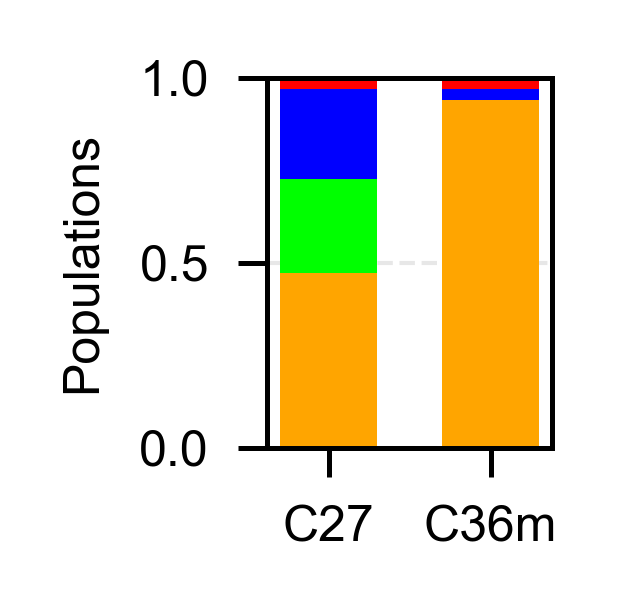

In [1]:
### BOTTOM RIGHT FIGURE FOR TABLE OF CONTENTS ###
### 4 Aug 2025 ###

import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------------
# CONFIGURATION
# -----------------------------------------------------------------------------

# Data from constraint analysis
FORCE_FIELD_LABELS = {
    'CHARMM27': 'C27',
    'CHARMM36m': 'C36m'
}
P_E_PLUS_N_VALUES = {'CHARMM27': 0.726, 'CHARMM36m': 0.940}
P_E_PLUS_C_VALUES = {'CHARMM27': 0.717, 'CHARMM36m': 0.976}
P_NC_VALUE = 0.03  # Fixed p_NC value

# State definitions
STATE_PLOT_ORDER = ['E', 'N', 'C', 'NC']  # Order for plotting (bottom to top in stack)
STATE_COLORS = {'E': '#FFA500', 'N': '#00FF00', 'C': '#0000FF', 'NC': '#FF0000'}  # VMD colors

# Plotting Specifications
FIGURE_WIDTH = 1.0
FIGURE_HEIGHT = 1.0
FONT_SIZES = {'labels': 6, 'text': 6, 'ticks': 6}
DPI = 600
BAR_WIDTH = 0.6

# -----------------------------------------------------------------------------
# ANALYSIS
# -----------------------------------------------------------------------------

def compute_populations_at_fixed_nc(p_nc, p_e_plus_n, p_e_plus_c):
    """Calculate populations of E, N, and C for fixed p_NC value.
    
    Args:
        p_nc: Population of NC state (fixed at 0.03)
        p_e_plus_n: Constraint value for p(E) + p(N)
        p_e_plus_c: Constraint value for p(E) + p(C)
        
    Returns:
        Array of populations in order [E, N, C, NC]
    """
    p_e = p_nc + p_e_plus_n + p_e_plus_c - 1
    p_n = 1 - p_e_plus_c - p_nc
    p_c = 1 - p_e_plus_n - p_nc
    
    return np.array([p_e, p_n, p_c, p_nc])

# -----------------------------------------------------------------------------
# PLOTTING
# -----------------------------------------------------------------------------

def set_plot_style():
    """Set consistent plot style for publication figures."""
    plt.rcParams.update({
        'font.family': 'Arial',
        'font.size': FONT_SIZES['text'],
        'axes.linewidth': 0.6,
        'axes.labelsize': FONT_SIZES['labels'],
        'axes.titlesize': FONT_SIZES['labels'],
        'xtick.major.width': 0.6,
        'ytick.major.width': 0.6,
        'xtick.labelsize': FONT_SIZES['ticks'],
        'ytick.labelsize': FONT_SIZES['ticks'],
        'lines.linewidth': 1.0,
        'figure.dpi': DPI,
        'savefig.dpi': DPI,
    })

def plot_stacked_populations(ax, all_populations):
    """Plot state populations as stacked bar chart."""
    force_fields = list(FORCE_FIELD_LABELS.keys())
    n_ff = len(force_fields)
    x_positions = np.arange(n_ff)
    
    # Initialize bottom positions for stacking
    bottoms = np.zeros(n_ff)
    
    # Plot each state as a layer in the stack
    for state_idx, state in enumerate(STATE_PLOT_ORDER):
        heights = [all_populations[ff][state_idx] for ff in force_fields]
        ax.bar(x_positions, heights, BAR_WIDTH, 
               bottom=bottoms, color=STATE_COLORS[state])
        bottoms += heights
    
    # Set x-axis
    ax.set_xticks(x_positions)
    ax.set_xticklabels([FORCE_FIELD_LABELS[ff] for ff in force_fields])
    
    # Set y-axis
    ax.set_ylim(0, 1)
    ax.set_yticks([0.0, 0.5, 1.0])
    ax.set_ylabel('Populations', fontsize=FONT_SIZES['labels'])
    
    # Add grid for easier reading
    ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.5)
    ax.set_axisbelow(True)
    
    ax.tick_params(axis='both', which='major', labelsize=FONT_SIZES['ticks'])

# -----------------------------------------------------------------------------
# MAIN
# -----------------------------------------------------------------------------

def main():
    """Main function to generate the plot."""
    set_plot_style()
    
    # Process data for each FF
    plot_data = {}
    force_fields = list(FORCE_FIELD_LABELS.keys())
    
    for ff in force_fields:
        # Compute populations at p_NC = 0.03
        populations = compute_populations_at_fixed_nc(
            P_NC_VALUE, 
            P_E_PLUS_N_VALUES[ff], 
            P_E_PLUS_C_VALUES[ff]
        )
        plot_data[ff] = populations
        
        # Print summary
        print(f"\n--- Populations for {FORCE_FIELD_LABELS[ff]} at p_NC = {P_NC_VALUE} ---")
        for state, population in zip(STATE_PLOT_ORDER, populations):
            print(f"  State {state}: {population:.4f}")
        print(f"  Total: {np.sum(populations):.4f}")
    
    # Create figure
    fig, ax = plt.subplots(1, 1, figsize=(FIGURE_WIDTH, FIGURE_HEIGHT))
    
    # Plot stacked bars
    plot_stacked_populations(ax, plot_data)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()